# Final Project for Biostats E-whatever

By: Barry Guglielmo

For: Dr. Bernard Rossner

5/14/2019

# Objective

The objective of my project is to work with the Heart Disease UCI dataset from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci/version/1) in order to demonstrate a proficiency of utilizing the tools and skills learned in biostatistics course E-whatever.

# Data Set: Heart Disease UCI

The Heart Disease UCI Data Set was obtained for free-non comercial use from the Kaggle website. Kaggle is a popular site for machine learning and statistical prediction compititions.

# Column Meanings

age: age in years

sex: (1 = male; 0 = female)

cp: chest pain typeValue 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic

trestbps: resting blood pressure (in mm Hg on admission to the hospital)

chol: serum cholestoral in mg/dl

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg: resting electrocardiographic results

thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment

ca: number of major vessels (0-3) colored by flourosopy

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

target: 1 or 0


# Hypotheses 
For the sake of Hypothosis testing let us state some very broad hypothoses:
    
    1. Men will have higher cholesterol compared with women
        >1 tailed t-test
    2. Cholesterol levels will be positively corrolated with increase in age
    3. Men will have stronger corrilation of age and heightened cholesterol
    4. Angina will be associated with cholesterol levels

# Exploring the Data

Let us take a look at the sape and distribution of our data.

In [7]:
# Library For manipulating Data Frames
import pandas as pd
df = pd.read_csv('heart.csv')

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Graph Histograms

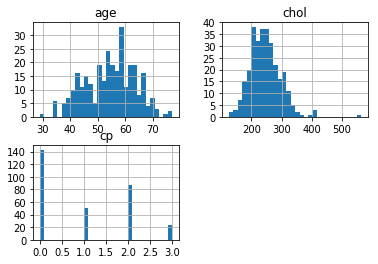

In [9]:
import matplotlib.pyplot as plt
df2 = pd.concat([df['age'], df['chol'], df['cp']], axis = 1)
df2.hist(bins = 30)
plt.savefig('Histograms.PNG', dpi = 800)
plt.rcParams.update({'font.size': 4})
plt.show()


In [10]:
df = pd.concat([df2, df['sex']], axis = 1)

# Sex and Heart Disease

In [13]:
from scipy import stats

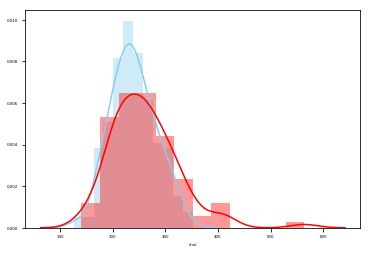

In [20]:
import seaborn as sns
#male
m = df.loc[df['sex']==1]
#female
f = df.loc[df['sex']==0]
#continuous variables
cont = ['chol']
# use seaborn to plot
for i in cont:
    sns.distplot(m[i], color = "skyblue", label = 'Male')
    sns.distplot(f[i], color = 'red', label = 'Female')
    plt.rcParams.update({'font.size': 12})
    plt.show()

In [18]:
from scipy import stats
stats.ttest_ind(m['chol'],f['chol'])

Ttest_indResult(statistic=-3.5029368327219244, pvalue=0.000529966610622664)

# Ages & Cholesterol



We will move forward by assigning an arbitrary age range of 10 year periods, this is just an easy way to practice what we have learned. Due to the fact that each age range has a different number of patients this study is imperfect for directly compairing these groups, however, we work with what we got.

Seperating out the ages 30 to 39, 40 to 49, 50 to 59, and 60 to 69 we can start to observe the differences in mean cholesterol.

In [112]:
#seperate ages
a30 = df.loc[(df['age'] < 40) & (df['age']>30)]
a40 = df.loc[(df['age'] < 50) & (df['age']>40)]
a50 = df.loc[(df['age'] < 60) & (df['age']>50)]
a60 = df.loc[(df['age'] < 70) & (df['age']>60)]
ages = [a30,a40,a50,a60]
txt = ['30 to 39', '40 to 49', '50 to 59', '60 to 69']
#print means
for i in range(0, len(ages)):
    print('mean cholesterol of ages %s : %f ' %  (txt[i], ages[i]['chol'].mean()))

mean cholesterol of 30 to 39 : 216.800000 
mean cholesterol of 40 to 49 : 237.565217 
mean cholesterol of 50 to 59 : 248.635593 
mean cholesterol of 60 to 69 : 261.681159 


Simply looking at this trend we can start to get an idea of where this pattern will lead us. Let us now use box plots to observe where these means fit in their prospective populations as well as the range of the upper and lower limits of each.

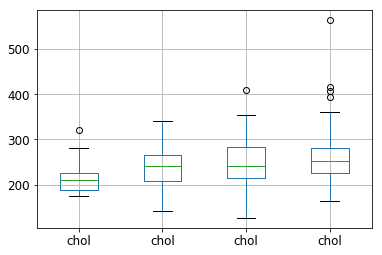

In [120]:
bdf = pd.DataFrame()
for i in ages:
    bdf = pd.concat([bdf, i['chol']], axis = 1)
bdf.boxplot()
plt.savefig('mean_boxplots.PNG')
plt.show()

This figure continues to support the idea that cholesterol has a trend to rise as age rises. The next step would be to look at the corrilation of age with cholesterol intake

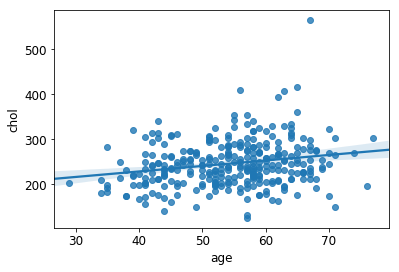

 The slope of the line is: 1.219441 
 The R squared value is: 0.213678 
 The p value is: 0.000179 
 The standard error is: 0.321344


In [144]:
sns.regplot(df['age'],df['chol'])
plt.savefig('best_fit.png')
plt.show()
import matplotlib.pyplot as plt
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df['age'], df['chol'])
print(' The slope of the line is: %f \n The R squared value is: %f \n The p value is: %f \n The standard error is: %f'
     %(slope, r_value, p_value, std_err))

# Sex - Age and Cholesterol

Here we can see that the slope is 1.219 which is a reasonable positive corrilation, however the spread of data points and the R squared statistic of 0.213 suggests that there is a fair bit of variation from this model. It is fair to say that this makes sense, after all people have different habits and life styles resulting in varying cholesterol levels. The fact that there is trend does suggest that withoug intervention or specific habits cholesterol is likely to rise.

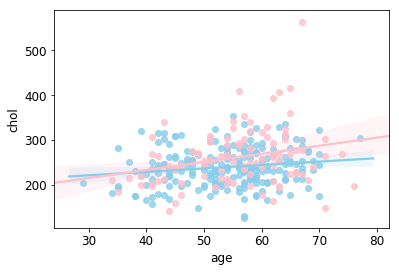

 MALE:
 The slope of the line is: 0.765626 
 The R squared value is: 0.158983 
 The p value is: 0.022132 
 The standard error is: 0.332070 
-------------------------------------
 FEMALE:
 The slope of the line is: 1.802328 
 The R squared value is: 0.260548 
 The p value is: 0.010352 
 The standard error is: 0.688837 
-------------------------------------


In [143]:
# male
m = df.loc[df['sex']==1]
# female
f = df.loc[df['sex']==0]

sns.regplot(m['age'],m['chol'], color = 'skyblue')
sns.regplot(f['age'],f['chol'], color = 'pink')
plt.savefig('best_fit.png')
plt.show()
import matplotlib.pyplot as plt
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(m['age'], m['chol'])
print(' MALE:\n The slope of the line is: %f \n The R squared value is: %f \n The p value is: %f \n The standard error is: %f \n-------------------------------------'
     %(slope, r_value, p_value, std_err))
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(f['age'], f['chol'])
print(' FEMALE:\n The slope of the line is: %f \n The R squared value is: %f \n The p value is: %f \n The standard error is: %f \n-------------------------------------'
     %(slope2, r_value2, p_value2, std_err2))

In [180]:
#get confidence intervals
import scipy
import scikits.bootstrap as bootstrap  
CIs = bootstrap.ci(data=m['chol'], statfunction=scipy.mean, alpha = 0.05)
print('Male\n Lower CI %f\n Upper CI %f' % (CIs[0], CIs[1]))
CIs = bootstrap.ci(data=f['chol'], statfunction=scipy.mean, alpha = 0.05)
print('Female\n Lower CI %f\n Upper CI %f' % (CIs[0], CIs[1]))

Male
 Lower CI 233.565217
 Upper CI 245.159420
Female
 Lower CI 249.739583
 Upper CI 276.093750


In [47]:
f1 = df.loc[(df['cp']== 1)]
f2 = df.loc[(df['cp']== 2)]
f3 = df.loc[(df['cp']== 3)]
f4 = df.loc[(df['cp']== 4)]

In [65]:
#expected
ml = len(m)
fl = len(f)
x = []
x.append(len(f1)/len(df))
x.append(len(f2)/len(df))
x.append(len(f3)/len(df))
fx = []
mx = []
for i in x:
    fx.append(ml*i)
    mx.append(fl*i)
    

In [66]:
mx

[15.841584158415841, 27.56435643564356, 7.287128712871287]

In [68]:
from scipy.stats import chisquare
counts = (len(f1.loc[f1['sex']==1]),len(f1.loc[f1['sex']==1]),len(f1.loc[f1['sex']==1]))
print(chisquare(counts, f_exp = fx))
counts = (len(f1.loc[f1['sex']==0]),len(f1.loc[f1['sex']==0]),len(f1.loc[f1['sex']==0]))
print(chisquare(counts, f_exp = mx))


Power_divergenceResult(statistic=29.683122886827498, pvalue=3.5841960947202453e-07)
Power_divergenceResult(statistic=19.36183617349741, pvalue=6.24641299517988e-05)


In [71]:
(fl)

96

In [72]:
ml+fl

303

Here we see that the 95 ci for men and women do not have much overlap. Perhaps this could be a useful tool for determining the sex of a patient without knowing.

surprisingly women have a higher likelihood of having a rise in cholesterol compared to men. Naturally we need to ask, is this trend significant.

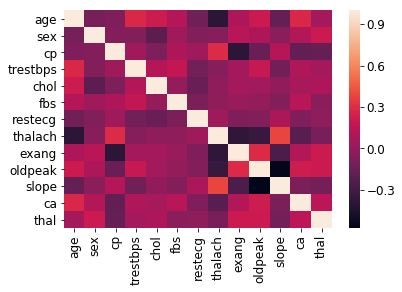

In [167]:
#drop target because we are not doing machine learning
df2 = df.drop(['target'], axis = 1)
corr = df2.corr()
sns.heatmap(corr)
plt.show()